In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

![Seaborn Logo](seaborn.png)

# Seaborn Tutorial - PART 1

**Ref: [Seaborn Tutorial 2021][1] by [Derek Banas][2]**

[1]: https://youtu.be/6GUZXDef2U0
[2]: https://www.youtube.com/c/derekbanas

[Seaborn][3] is a Python data visualization library based on [Matplotlib][4]. It provides a high-level interface for drawing attractive and informative statistical graphics.

Generally `matplotlib` takes several lines of code to generate a plot but `seaborn` makes assumptions based on the data-points passed to it and tries to generate similar plot with just one line of code.

[API reference][5].

[3]: https://seaborn.pydata.org/
[4]: https://matplotlib.org/
[5]: https://seaborn.pydata.org/api.html

### Install & load Seaborn library

Run below command if `seaborn` is not already installed.

```bash
pip install seaborn
```
or
```bash
conda install seaborn
```

In [2]:
import seaborn as sns

print("Seaborn version: ", sns.__version__)

Seaborn version:  0.11.2


<IPython.core.display.Javascript object>

### Import Dataset

`seaborn` library has built in datasets. To get the list of datasets:

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


<IPython.core.display.Javascript object>

Let use _car_crashes_ dataset.

In [4]:
cc_df = sns.load_dataset("car_crashes")
cc_df.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


<IPython.core.display.Javascript object>

## Distribution Plots

Types of [Distribution Plots](https://seaborn.pydata.org/api.html#distribution-plots):

1. Distribution Plot
2. Joint Plot
3. KDE Plot
4. Pair Plot
5. Rug Pot

### 1. Distribution Plot

Distribution Plot is used to observe **Univariate Distributions**. Pick the feature to plot:

In [5]:
x_vals = cc_df["not_distracted"]

<IPython.core.display.Javascript object>

Create distribution plot for the `not_distracted` feature:

C:\Users\dheem\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

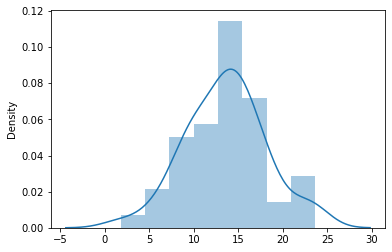

<IPython.core.display.Javascript object>

In [6]:
sns.distplot(x=x_vals)

Hiding _Kernel Density Estimation_ (kde) and Testing `bins`.

C:\Users\dheem\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

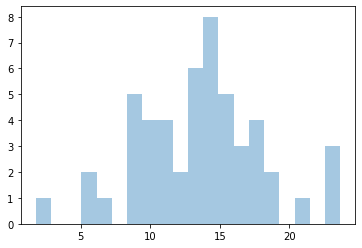

<IPython.core.display.Javascript object>

In [7]:
sns.distplot(x=x_vals, kde=False, bins=20)  # kde is True by default.

Following the warning on `distplot` getting deprecated, lets replace `distplot` with `displot` and `histplot` to check the difference.

#### `displot()`

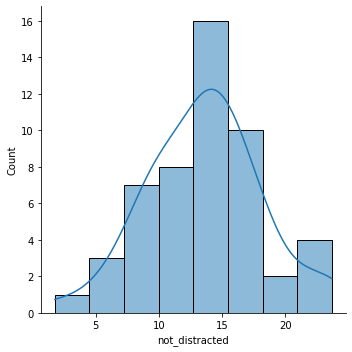

<IPython.core.display.Javascript object>

In [8]:
sns.displot(x=x_vals, kde=True)  # kde is False by default.

#### `histplot()`

<AxesSubplot:xlabel='not_distracted', ylabel='Count'>

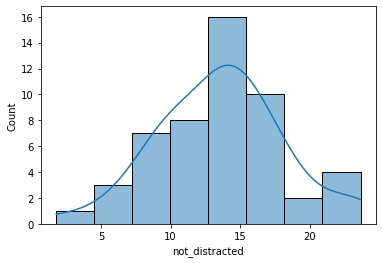

<IPython.core.display.Javascript object>

In [9]:
sns.histplot(x=x_vals, kde=True)  # kde is False by default.

### 2. Joint Plot

Joint Plot is used to observe **Bivariate Distributions** i.e., two features. Pick the feature to plot:

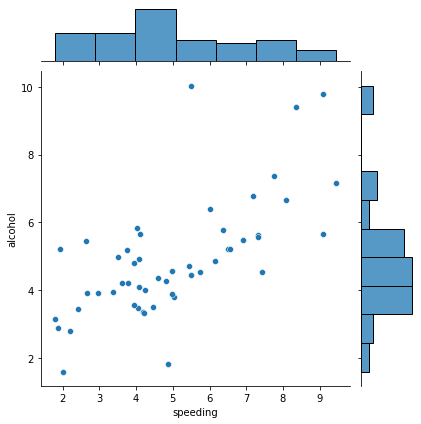

<IPython.core.display.Javascript object>

In [10]:
sns.jointplot(x="speeding", y="alcohol", data=cc_df)  # kind is "scatter" by default.

Setting `kind` to "reg" (_Regression_).

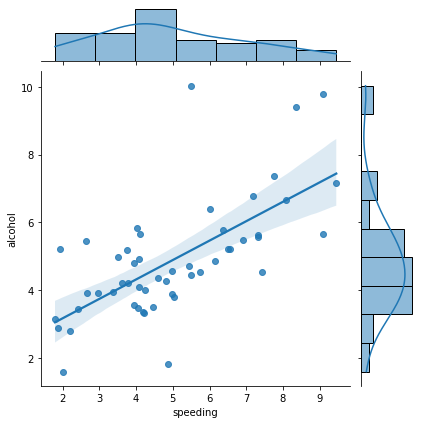

<IPython.core.display.Javascript object>

In [11]:
sns.jointplot(x="speeding", y="alcohol", data=cc_df, kind="reg")  # "reg" => "Regression"

Setting `kind` to "kde" (_Kernel Density Estimation_).

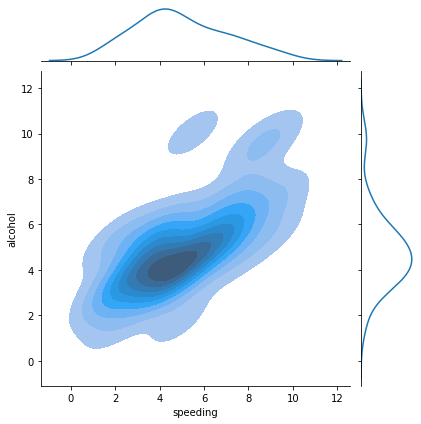

<IPython.core.display.Javascript object>

In [12]:
sns.jointplot(x="speeding", y="alcohol", data=cc_df, kind="kde", shade=True)

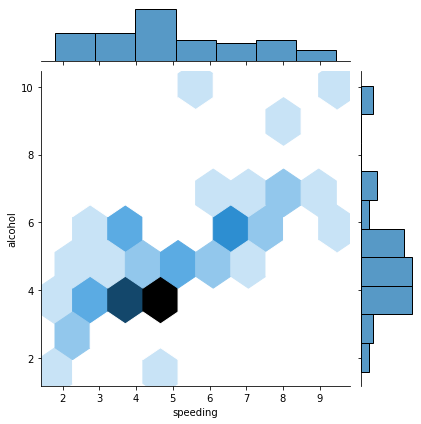

<IPython.core.display.Javascript object>

In [13]:
sns.jointplot(x="speeding", y="alcohol", data=cc_df, kind="hex")

### 3. KDE Plot

To plot just the _Kernel Density Estimation_ of a variable.

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

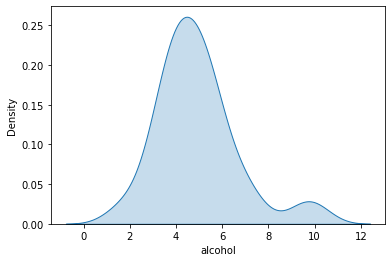

<IPython.core.display.Javascript object>

In [14]:
sns.kdeplot(x=cc_df["alcohol"], shade=True)

<AxesSubplot:xlabel='speeding', ylabel='alcohol'>

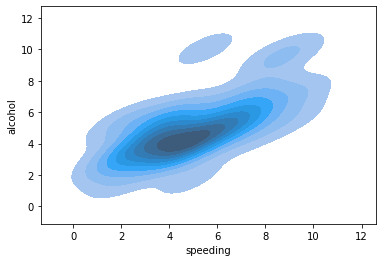

<IPython.core.display.Javascript object>

In [15]:
sns.kdeplot(x=cc_df["speeding"], y=cc_df["alcohol"], shade=True)

### 4. Pair Plots

Pair Plot, plots the relationship across the entire numerical values in a `DataFrame`.

Load smaller dataset - _tips_ - to visualize Pair Plot.

In [16]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<IPython.core.display.Javascript object>

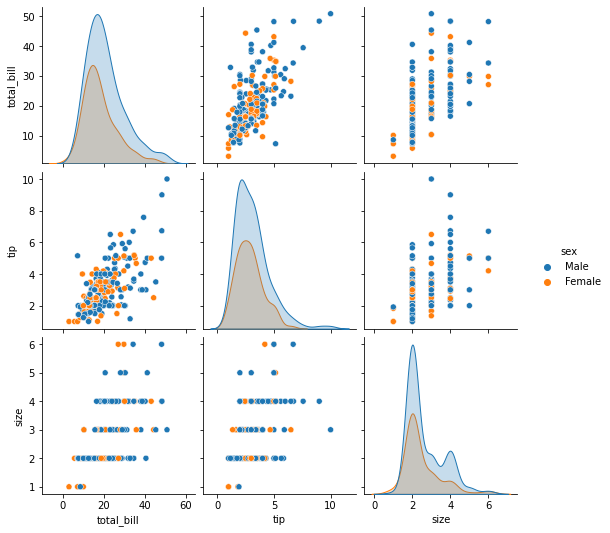

<IPython.core.display.Javascript object>

In [17]:
sns.pairplot(tips_df, hue="sex")

### 5. Rug Plot

Rug Plot, plots single column of data-points in a `DataFrame` as sticks.

<AxesSubplot:xlabel='tip'>

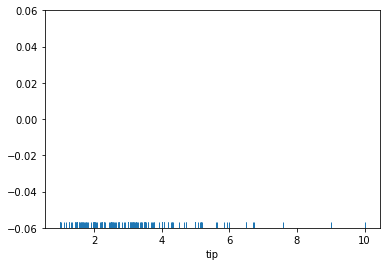

<IPython.core.display.Javascript object>

In [18]:
sns.rugplot(tips_df["tip"])

Sticks are denser where tip amounts are more common. 